In [5]:
from glob import glob
'''
sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
'''
sids = ['WMAZE_018']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    # Grab the mask files for each subject
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/mask/anat_masks/_subject_id_' + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(sorted(mask_filenames_glob))
    # Grab the cope files for each subject
    subjcopes_glob = glob(proj_dir + '/frstlvl/wmaze_MRthesis/fixed_before_conditional/model3_2-3-2-5/merge_copes/'
                          + SID + '/merged/cope_*')
    cope_files.append(sorted(subjcopes_glob))
    # If there are no cope files, print subject id
    if len(cope_files[-1]) == 0:
        print(SID)

WMAZE_018
Learning (0.21286714, 0.030043233590989989)
Nonlearning (0.20580558, 0.092234099377034404)


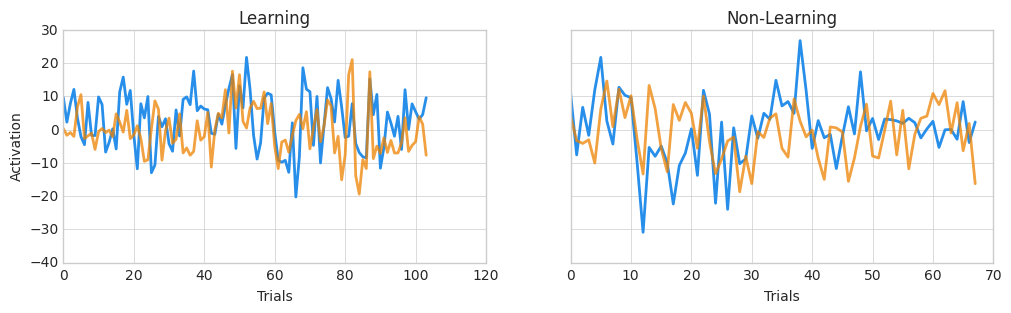

WMAZE_022
Learning (0.48965117, 1.1516759464921834e-07)
Nonlearning (0.23635283, 0.042622342824702002)


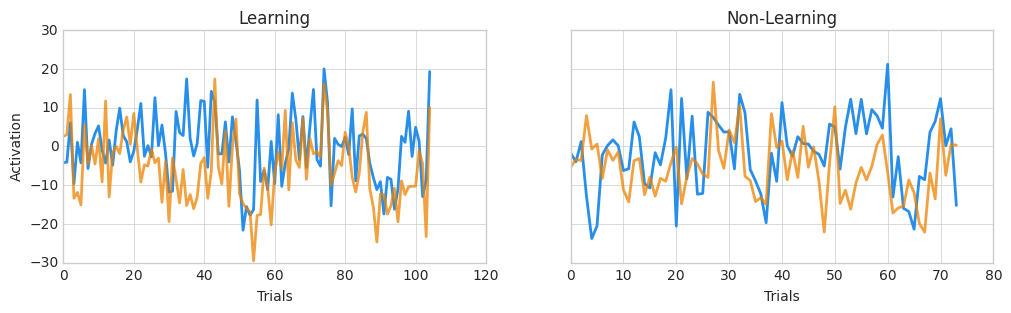

In [2]:
import nibabel as nb
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
#sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lh_hp_nonlearning':[], 'rh_hp_nonlearning':[], 
            'lh_hp_learning':[], 'rh_hp_learning':[],                 
            'lh_caudate_nonlearning':[], 'rh_caudate_nonlearning':[], 
            'lh_caudate_learning':[], 'rh_caudate_learning':[],  
            'lh_dlPFC_nonlearning':[], 'rh_dlPFC_nonlearning':[], 
            'lh_dlPFC_learning':[], 'rh_dlPFC_learning':[],            
            'lh_mPFC_nonlearning':[], 'rh_mPFC_nonlearning':[], 
            'lh_mPFC_learning':[], 'rh_mPFC_learning':[]}

corr_matrix = np.zeros((len(sids), 5))

# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][7])
    
    lh_caudate_img = nb.load(mask_filenames[i][5])
    rh_caudate_img = nb.load(mask_filenames[i][10])
    
    lh_dlPFC_img = nb.load(mask_filenames[i][0])
    rh_dlPFC_img = nb.load(mask_filenames[i][6])
    
    lh_mPFC_img = nb.load(mask_filenames[i][12])
    rh_mPFC_img = nb.load(mask_filenames[i][13])
    
    
    #Load copes for learning vs nonlearning betas
    cope_learning_img = nb.load(cope_files[i][0])
    cope_nonlearning_img = nb.load(cope_files[i][1])
     
  
    ########################
    ### Left Hippocampus ###
    ########################
    
    # cope_nonlearning
    lh_hp_nonlearning_data = cope_nonlearning_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_nonlearning'].append(lh_hp_nonlearning_data[0:-1])
    
    # cope_learning
    lh_hp_learning_data = cope_learning_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_learning'].append(lh_hp_learning_data[0:-1])
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # cope_nonlearning
    rh_hp_nonlearning_data = cope_nonlearning_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_nonlearning'].append(rh_hp_nonlearning_data[0:-1])

    # cope_learning
    rh_hp_learning_data = cope_learning_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_learning'].append(rh_hp_learning_data[0:-1])
    
    #####################
    ### Left Caudate ###
    ##################### 
    
    # cope_nonlearning
    lh_caudate_nonlearning_data = cope_nonlearning_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_nonlearning'].append(lh_caudate_nonlearning_data[0:-1])

    # cope_learning
    lh_caudate_learning_data = cope_learning_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_learning'].append(lh_caudate_learning_data[0:-1])
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # cope_nonlearning
    rh_caudate_nonlearning_data = cope_nonlearning_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_nonlearning'].append(rh_caudate_nonlearning_data[0:-1])

    # cope_learning
    rh_caudate_learning_data = cope_learning_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_learning'].append(rh_caudate_learning_data[0:-1])  
    
    ####################
    #### Left mPFC #####
    ####################
    
    # cope_nonlearning
    lh_mPFC_nonlearning_data = cope_nonlearning_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_nonlearning'].append(lh_mPFC_nonlearning_data[0:-1])
    
    # cope_learning
    lh_mPFC_learning_data = cope_learning_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_learning'].append(lh_mPFC_learning_data[0:-1])    
    
    #####################
    #### Right mPFC #####
    #####################
    
    # cope_nonlearning
    rh_mPFC_nonlearning_data = cope_nonlearning_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_nonlearning'].append(rh_mPFC_nonlearning_data[0:-1])

    # cope_learning
    rh_mPFC_learning_data = cope_learning_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_learning'].append(rh_mPFC_learning_data[0:-1]) 
    
    ####################
    #### Left dlPFC ####
    ####################
    
    # cope_nonlearning
    lh_dlPFC_nonlearning_data = cope_nonlearning_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_nonlearning'].append(lh_dlPFC_nonlearning_data[0:-1])
    
    # cope_learning
    lh_dlPFC_learning_data = cope_learning_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_learning'].append(lh_dlPFC_learning_data[0:-1])  
    
    #####################
    ### Right dlPFC ###
    #####################
    
    # cope_nonlearning
    rh_dlPFC_nonlearning_data = cope_nonlearning_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_nonlearning'].append(rh_dlPFC_nonlearning_data[0:-1])

    # cope_learning
    rh_dlPFC_learning_data = cope_learning_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_learning'].append(rh_dlPFC_learning_data[0:-1])    
    
    #array with keys for each part of all_data dictionary
    all_keys = ['lh_hp_nonlearning', 'rh_hp_nonlearning', 
                'lh_hp_learning', 'rh_hp_learning',                 
                'lh_caudate_nonlearning', 'rh_caudate_nonlearning', 
                'lh_caudate_learning', 'rh_caudate_learning',  
                'lh_dlPFC_nonlearning', 'rh_dlPFC_nonlearning', 
                'lh_dlPFC_learning', 'rh_dlPFC_learning',            
                'lh_mPFC_nonlearning', 'rh_mPFC_nonlearning', 
                'lh_mPFC_learning', 'rh_mPFC_learning']
    
    for key in all_keys: 
        # averaging each column for only the current participant 
        all_data[key][-1] = np.mean(all_data[key][-1], axis = 0)
       
    #Combined Hippocampus average for nonlearning and learning for current sub
    all_data['hp_nonlearning'] = (np.array(all_data['lh_hp_nonlearning'][-1]) + 
                              np.array(all_data['rh_hp_nonlearning'][-1]))/2.
    all_data['hp_learning'] = (np.array(all_data['lh_hp_learning'][-1]) + 
                               np.array(all_data['rh_hp_learning'][-1]))/2.
                             
    #Combined Caudate average for nonlearning and learning for current sub
    all_data['caudate_nonlearning'] = (np.array(all_data['lh_caudate_nonlearning'][-1]) + 
                                   np.array(all_data['rh_caudate_nonlearning'][-1]))/2.
    all_data['caudate_learning'] = (np.array(all_data['lh_caudate_learning'][-1]) + 
                                    np.array(all_data['rh_caudate_learning'][-1]))/2.

    # Combined mPFC average for nonlearning and learning for current sub
    all_data['mPFC_nonlearning'] = (np.array(all_data['lh_mPFC_nonlearning'][-1]) + 
                                np.array(all_data['rh_mPFC_nonlearning'][-1]))/2.
    all_data['mPFC_learning'] = (np.array(all_data['lh_mPFC_learning'][-1]) + 
                                 np.array(all_data['rh_mPFC_learning'][-1]))/2.

    #Combined dlPFC average for nonlearning and learning for current sub
    all_data['dlPFC_nonlearning'] = (np.array(all_data['lh_dlPFC_nonlearning'][-1]) + 
                                 np.array(all_data['rh_dlPFC_nonlearning'][-1]))/2.
    all_data['dlPFC_learning'] = (np.array(all_data['lh_dlPFC_learning'][-1]) + 
                                  np.array(all_data['rh_dlPFC_learning'][-1]))/2.      

    y = all_data['hp_learning'] #blue
    ax1 = []
    for m in range(0, len(y), 1):
        ax1.append(m)
    x1 = ax1
    
    z = all_data['mPFC_learning'] #purple
    ax2 = []
    for n in range(0, len(z), 1):
        ax2.append(n)
    x2 = ax2
    
    a = all_data['hp_nonlearning'] #blue
    ax3 = []
    for o in range(0, len(a), 1):
        ax3.append(o)
    x3 = ax3
    
    b = all_data['mPFC_nonlearning'] #purple
    ax4 = []
    for p in range(0, len(b), 1):
        ax4.append(p)
    x4 = ax4

    fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(12, 3), sharex = False, sharey = True)
    ax.plot(x1, y, color = '#278fea', alpha = 1, linewidth = 2)
    #ax.scatter(x1, y, c = '#5c0eb5', alpha = 1)
    ax.plot(x2, z, color = '#ed8200', alpha = 0.75, linewidth = 2)
    #ax.scatter(x2, z, c = '#f97502', alpha = 0.5)
    ax.set_ylabel('Activation')
    ax.set_xlabel('Trials')
    ax.set_title('Learning')
    #ax.legend(['Hippocampus', 'mPFC'], loc = 1)
     
    ax2.plot(x3, a, color = '#278fea', alpha = 1, linewidth = 2)
    #ax2.scatter(x3, a, c = '#5c0eb5', alpha = 0.5)
    ax2.plot(x4, b, color = '#ed8200', alpha = 0.75, linewidth = 2)
    #ax2.scatter(x4, b, c = '#f97502', alpha = 0.5)
    ax2.set_xlabel('Trials')
    ax2.set_title('Non-Learning')
    #ax2.legend(['Hippocampus', 'mPFC'], loc = 1)
    plt.savefig("/home/arenf001/model3LSS_lineplot.png", dpi = 1080)
    print all_data['subjid'][-1]
    print "Learning", stats.pearsonr(all_data['hp_learning'], all_data['mPFC_learning'])
    print "Nonlearning", stats.pearsonr(all_data['hp_nonlearning'], all_data['mPFC_nonlearning'])
    plt.show()
    

WMAZE_018
Learning (0.41526696, 1.1686441225423058e-05)
Nonlearning (0.39601529, 0.00082915033605849317)


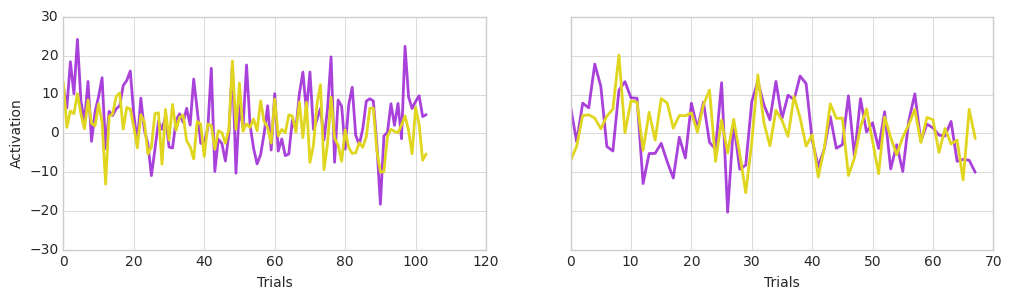

In [6]:
import nibabel as nb
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
#sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lh_hp_nonlearning':[], 'rh_hp_nonlearning':[], 
            'lh_hp_learning':[], 'rh_hp_learning':[],                 
            'lh_caudate_nonlearning':[], 'rh_caudate_nonlearning':[], 
            'lh_caudate_learning':[], 'rh_caudate_learning':[],  
            'lh_dlPFC_nonlearning':[], 'rh_dlPFC_nonlearning':[], 
            'lh_dlPFC_learning':[], 'rh_dlPFC_learning':[],            
            'lh_mPFC_nonlearning':[], 'rh_mPFC_nonlearning':[], 
            'lh_mPFC_learning':[], 'rh_mPFC_learning':[]}

corr_matrix = np.zeros((len(sids), 5))

# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][1])
    rh_hp_img = nb.load(mask_filenames[i][7])
    
    lh_caudate_img = nb.load(mask_filenames[i][5])
    rh_caudate_img = nb.load(mask_filenames[i][10])
    
    lh_dlPFC_img = nb.load(mask_filenames[i][0])
    rh_dlPFC_img = nb.load(mask_filenames[i][6])
    
    lh_mPFC_img = nb.load(mask_filenames[i][12])
    rh_mPFC_img = nb.load(mask_filenames[i][13])
    
    
    #Load copes for learning vs nonlearning betas
    cope_learning_img = nb.load(cope_files[i][0])
    cope_nonlearning_img = nb.load(cope_files[i][1])
     
  
    ########################
    ### Left Hippocampus ###
    ########################
    
    # cope_nonlearning
    lh_hp_nonlearning_data = cope_nonlearning_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_nonlearning'].append(lh_hp_nonlearning_data[0:-1])
    
    # cope_learning
    lh_hp_learning_data = cope_learning_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lh_hp_learning'].append(lh_hp_learning_data[0:-1])
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # cope_nonlearning
    rh_hp_nonlearning_data = cope_nonlearning_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_nonlearning'].append(rh_hp_nonlearning_data[0:-1])

    # cope_learning
    rh_hp_learning_data = cope_learning_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rh_hp_learning'].append(rh_hp_learning_data[0:-1])
    
    #####################
    ### Left Caudate ###
    ##################### 
    
    # cope_nonlearning
    lh_caudate_nonlearning_data = cope_nonlearning_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_nonlearning'].append(lh_caudate_nonlearning_data[0:-1])

    # cope_learning
    lh_caudate_learning_data = cope_learning_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lh_caudate_learning'].append(lh_caudate_learning_data[0:-1])
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # cope_nonlearning
    rh_caudate_nonlearning_data = cope_nonlearning_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_nonlearning'].append(rh_caudate_nonlearning_data[0:-1])

    # cope_learning
    rh_caudate_learning_data = cope_learning_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rh_caudate_learning'].append(rh_caudate_learning_data[0:-1])  
    
    ####################
    #### Left mPFC #####
    ####################
    
    # cope_nonlearning
    lh_mPFC_nonlearning_data = cope_nonlearning_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_nonlearning'].append(lh_mPFC_nonlearning_data[0:-1])
    
    # cope_learning
    lh_mPFC_learning_data = cope_learning_img.get_data()[lh_mPFC_img.get_data() > 0.]
    all_data['lh_mPFC_learning'].append(lh_mPFC_learning_data[0:-1])    
    
    #####################
    #### Right mPFC #####
    #####################
    
    # cope_nonlearning
    rh_mPFC_nonlearning_data = cope_nonlearning_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_nonlearning'].append(rh_mPFC_nonlearning_data[0:-1])

    # cope_learning
    rh_mPFC_learning_data = cope_learning_img.get_data()[rh_mPFC_img.get_data() > 0.]
    all_data['rh_mPFC_learning'].append(rh_mPFC_learning_data[0:-1]) 
    
    ####################
    #### Left dlPFC ####
    ####################
    
    # cope_nonlearning
    lh_dlPFC_nonlearning_data = cope_nonlearning_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_nonlearning'].append(lh_dlPFC_nonlearning_data[0:-1])
    
    # cope_learning
    lh_dlPFC_learning_data = cope_learning_img.get_data()[lh_dlPFC_img.get_data() > 0.]
    all_data['lh_dlPFC_learning'].append(lh_dlPFC_learning_data[0:-1])  
    
    #####################
    ### Right dlPFC ###
    #####################
    
    # cope_nonlearning
    rh_dlPFC_nonlearning_data = cope_nonlearning_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_nonlearning'].append(rh_dlPFC_nonlearning_data[0:-1])

    # cope_learning
    rh_dlPFC_learning_data = cope_learning_img.get_data()[rh_dlPFC_img.get_data() > 0.]
    all_data['rh_dlPFC_learning'].append(rh_dlPFC_learning_data[0:-1])    
    
    #array with keys for each part of all_data dictionary
    all_keys = ['lh_hp_nonlearning', 'rh_hp_nonlearning', 
                'lh_hp_learning', 'rh_hp_learning',                 
                'lh_caudate_nonlearning', 'rh_caudate_nonlearning', 
                'lh_caudate_learning', 'rh_caudate_learning',  
                'lh_dlPFC_nonlearning', 'rh_dlPFC_nonlearning', 
                'lh_dlPFC_learning', 'rh_dlPFC_learning',            
                'lh_mPFC_nonlearning', 'rh_mPFC_nonlearning', 
                'lh_mPFC_learning', 'rh_mPFC_learning']
    
    for key in all_keys: 
        # averaging each column for only the current participant 
        all_data[key][-1] = np.mean(all_data[key][-1], axis = 0)
       
    #Combined Hippocampus average for nonlearning and learning for current sub
    all_data['hp_nonlearning'] = (np.array(all_data['lh_hp_nonlearning'][-1]) + 
                              np.array(all_data['rh_hp_nonlearning'][-1]))/2.
    all_data['hp_learning'] = (np.array(all_data['lh_hp_learning'][-1]) + 
                               np.array(all_data['rh_hp_learning'][-1]))/2.
                             
    #Combined Caudate average for nonlearning and learning for current sub
    all_data['caudate_nonlearning'] = (np.array(all_data['lh_caudate_nonlearning'][-1]) + 
                                   np.array(all_data['rh_caudate_nonlearning'][-1]))/2.
    all_data['caudate_learning'] = (np.array(all_data['lh_caudate_learning'][-1]) + 
                                    np.array(all_data['rh_caudate_learning'][-1]))/2.

    # Combined mPFC average for nonlearning and learning for current sub
    all_data['mPFC_nonlearning'] = (np.array(all_data['lh_mPFC_nonlearning'][-1]) + 
                                np.array(all_data['rh_mPFC_nonlearning'][-1]))/2.
    all_data['mPFC_learning'] = (np.array(all_data['lh_mPFC_learning'][-1]) + 
                                 np.array(all_data['rh_mPFC_learning'][-1]))/2.

    #Combined dlPFC average for nonlearning and learning for current sub
    all_data['dlPFC_nonlearning'] = (np.array(all_data['lh_dlPFC_nonlearning'][-1]) + 
                                 np.array(all_data['rh_dlPFC_nonlearning'][-1]))/2.
    all_data['dlPFC_learning'] = (np.array(all_data['lh_dlPFC_learning'][-1]) + 
                                  np.array(all_data['rh_dlPFC_learning'][-1]))/2.      

    y = all_data['caudate_learning'] #blue
    ax1 = []
    for m in range(0, len(y), 1):
        ax1.append(m)
    x1 = ax1
    
    z = all_data['dlPFC_learning'] #purple
    ax2 = []
    for n in range(0, len(z), 1):
        ax2.append(n)
    x2 = ax2
    
    a = all_data['caudate_nonlearning'] #blue
    ax3 = []
    for o in range(0, len(a), 1):
        ax3.append(o)
    x3 = ax3
    
    b = all_data['dlPFC_nonlearning'] #purple
    ax4 = []
    for p in range(0, len(b), 1):
        ax4.append(p)
    x4 = ax4

    fig, (ax, ax2) = plt.subplots(ncols = 2, figsize=(12, 3), sharex = False, sharey = True)
    ax.plot(x2, z, color = '#8d02ce', alpha = 0.75, linewidth = 2)
    ax.plot(x1, y, color = '#e0d61f', alpha = 1, linewidth = 2)
    #ax.scatter(x2, z, c = '#f97502', alpha = 0.5)
    ax.set_ylabel('Activation')
    ax.set_xlabel('Trials')
    #ax.set_title('Learning')
    #ax.legend(['Caudate', 'dlPFC'], loc = 1)
     
    
    ax2.plot(x4, b, color = '#8d02ce', alpha = 0.75, linewidth = 2)
    ax2.plot(x3, a, color = '#e0d61f', alpha = 1, linewidth = 2)
    #ax2.scatter(x4, b, c = '#f97502', alpha = 0.5)
    ax2.set_xlabel('Trials')
    #ax2.set_title('Non-Learning')
    #ax2.legend(['Caudate', 'dlPFC'], loc = 1)
    plt.savefig("/home/arenf001/model3LSS_lineplot2.png", dpi = 1080)
    print all_data['subjid'][-1]
    print "Learning", stats.pearsonr(all_data['caudate_learning'], all_data['dlPFC_learning'])
    print "Nonlearning", stats.pearsonr(all_data['caudate_nonlearning'], all_data['dlPFC_nonlearning'])
    plt.show()
    

In [ ]:
import numpy as np
x = (np.random.rand(20,30) > 0.85) * 1
print x
#x1 = x * 1
#print x1